In [1]:
# Import necessary libraries

# Import the required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import the plotting function for decision regions
from mlxtend.plotting import plot_decision_regions

# Import the required libraries for building the machine learning models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import the required libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

# Import the pickle library for saving and loading models
import pickle


In [2]:
df = pd.read_csv("adult.csv")  # Read the CSV file "adult.csv" and store it in a DataFrame named 'df'

In [3]:
df.head()  # Display the first few rows of the DataFrame 'df'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape  # Print the dimensions (number of rows and columns) of the DataFrame 'df'


(32561, 15)

In [5]:
df.columns  # Print the column names of the DataFrame 'df'


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [6]:
df = df.iloc[:, [0, 1, 2, 3, 4, 6, 9, 10, 11, 12, 13, 14]]
# Select specific columns from the DataFrame 'df' using iloc


In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Prof-specialty,Female,0,0,40,Cuba,<=50K


In [8]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
# Remove leading and trailing whitespaces from string values in the DataFrame 'df'


In [9]:
df.replace("?", np.nan, inplace=True)
# Replace "?" with NaN (missing value) in the DataFrame 'df'


In [10]:
df.replace("?", np.nan, inplace=True)
# Replace "?" with NaN (missing value) in the DataFrame 'df'


In [11]:
df["workclass"] = df["workclass"].fillna(df["workclass"].mode()[0])
# Fill missing values in the 'workclass' column with the mode (most frequent value)

df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])
# Fill missing values in the 'occupation' column with the mode (most frequent value)


In [12]:
df.dropna(inplace=True)
# Drop rows with missing values (NaN) from the DataFrame 'df'


In [13]:
df.shape

(31978, 12)

In [14]:
df.describe()
# Generate descriptive statistics of the numerical columns in the DataFrame 'df'


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,31978.000000,3.197800e+04,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1.897141e+05,10.071236,1064.360623,86.739352,40.417850
std,13.662085,1.057255e+05,2.560667,7298.596271,401.594301,12.345285
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176202e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.373790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Univariate Analysis

In [15]:
df["salary"].value_counts(normalize=True)*100
# Count the occurrences of each unique value in the 'salary' column and compute the relative frequencies


<=50K    75.936581
>50K     24.063419
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary', ylabel='count'>

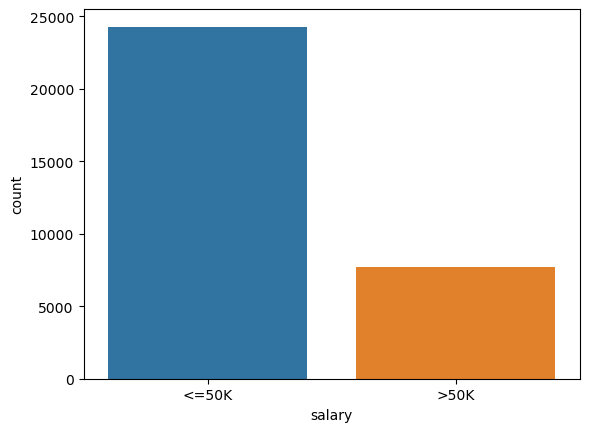

In [16]:
sns.countplot(data=df,x="salary")

- As we can see the data contain more number of people which have salary less than 50K 
+Here 75% of the data is of the people whose salary is below 50K
+And the rest 25% percent are the people whose salary is more than 50K

Male      66.827194
Female    33.172806
Name: sex, dtype: float64


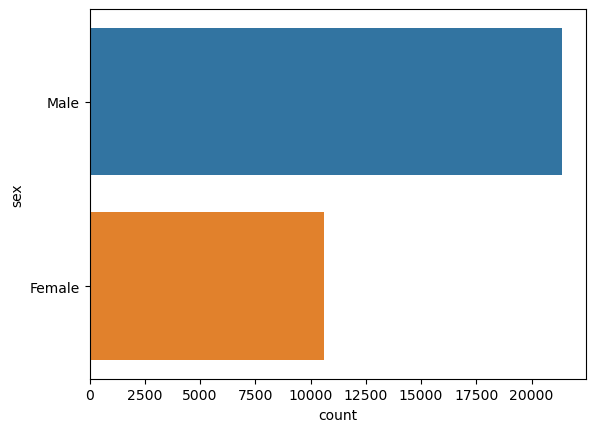

In [17]:
sns.countplot(data=df,y="sex")
print(df["sex"].value_counts(normalize=True)*100)


+ The population of male in the data is more than the number of female population

In [18]:
df["hours-per-week"].value_counts()

40    14932
50     2772
45     1784
60     1439
35     1277
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

Private             24095
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


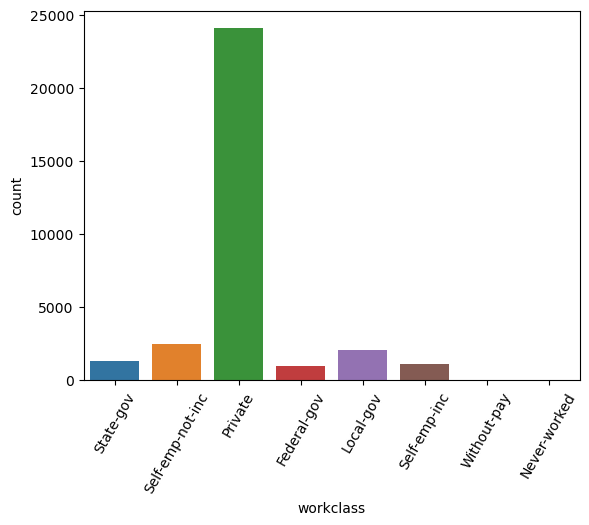

In [19]:
print(df["workclass"].value_counts())
sns.countplot(data=df,x="workclass")
plt.xticks(rotation=60)
plt.show()

Prof-specialty       5854
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64


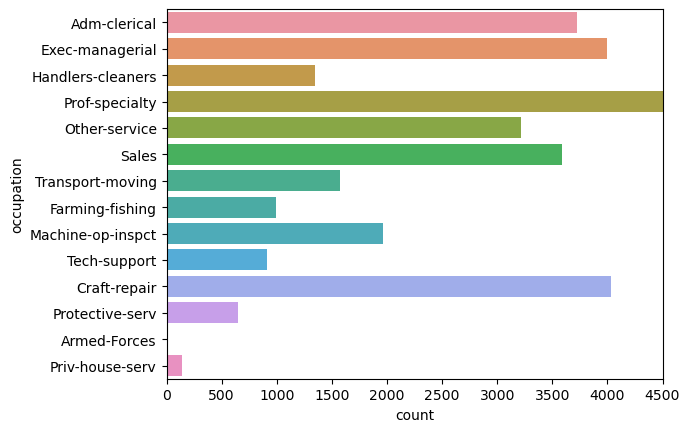

In [20]:
sns.countplot(data=df,y="occupation")
plt.xlim(0,4500)
print(df["occupation"].value_counts())

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Cuba'),
  Text(2, 0, 'Jamaica'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'South'),
  Text(6, 0, 'Puerto-Rico'),
  Text(7, 0, 'Honduras'),
  Text(8, 0, 'England'),
  Text(9, 0, 'Canada'),
  Text(10, 0, 'Germany'),
  Text(11, 0, 'Iran'),
  Text(12, 0, 'Philippines'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'Poland'),
  Text(15, 0, 'Columbia'),
  Text(16, 0, 'Cambodia'),
  Text(17, 0, 'Thailand'),
  Text(18, 0, 'Ecuador'),
  Text(19, 0, 'Laos'),
  Text(20, 0, 'Taiwan'),
  Text(21, 0, 'Haiti'),
  Text(22, 0, 'Portugal'),
  Text(23, 0, 'Dominican-Republic'),
  Text(24, 0, 'El-Salvador'),
  Text(25, 0, 'France'),
  Text(26, 0, 'Guatemala'),
  Text(27, 0, 'China'),
  Text(28, 0, 'Japan'),
  Text(29, 0, 'Yugoslavia'),
  Text(30, 0, 'Peru'),
  Te

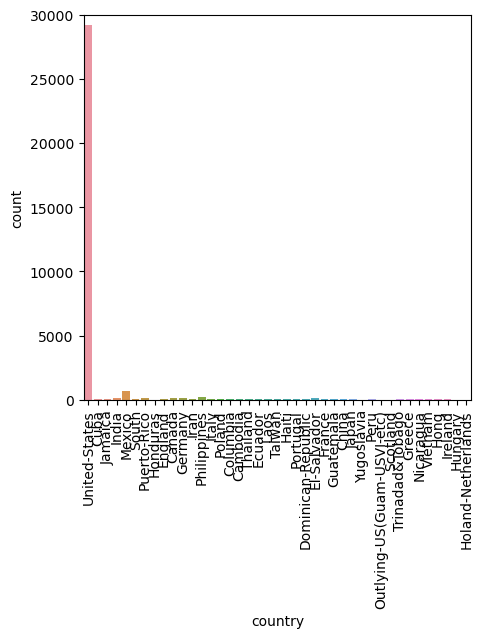

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="country")
print(df["country"].value_counts())
plt.ylim(0,30000)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='count', ylabel='education'>

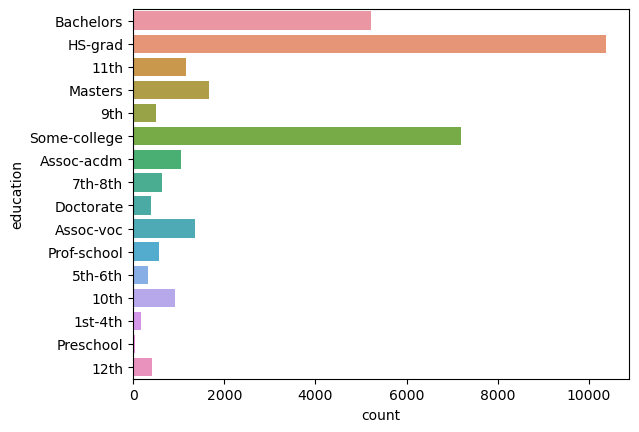

In [22]:
sns.countplot(data=df,y="education")

In [23]:
df["education"].value_counts()

HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: education, dtype: int64

In [24]:
df["age"].describe()

count    31978.000000
mean        38.579023
std         13.662085
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

(0.0, 1000.0)

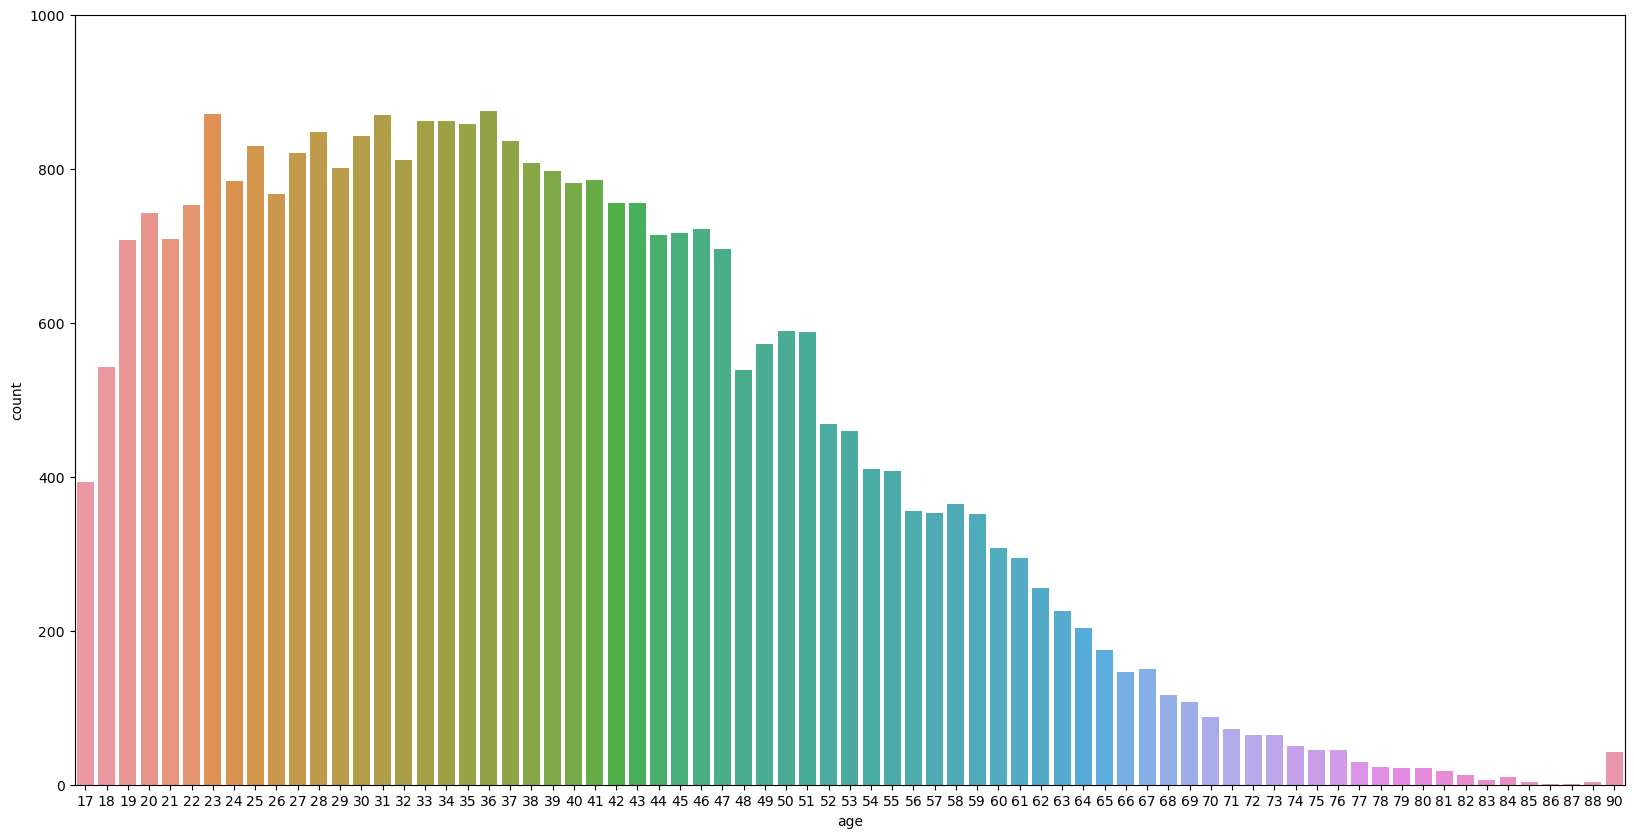

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='age')
plt.tick_params(labelsize=10,which="major")
plt.ylim(0,1000)


Text(0.5, 0, 'Age')

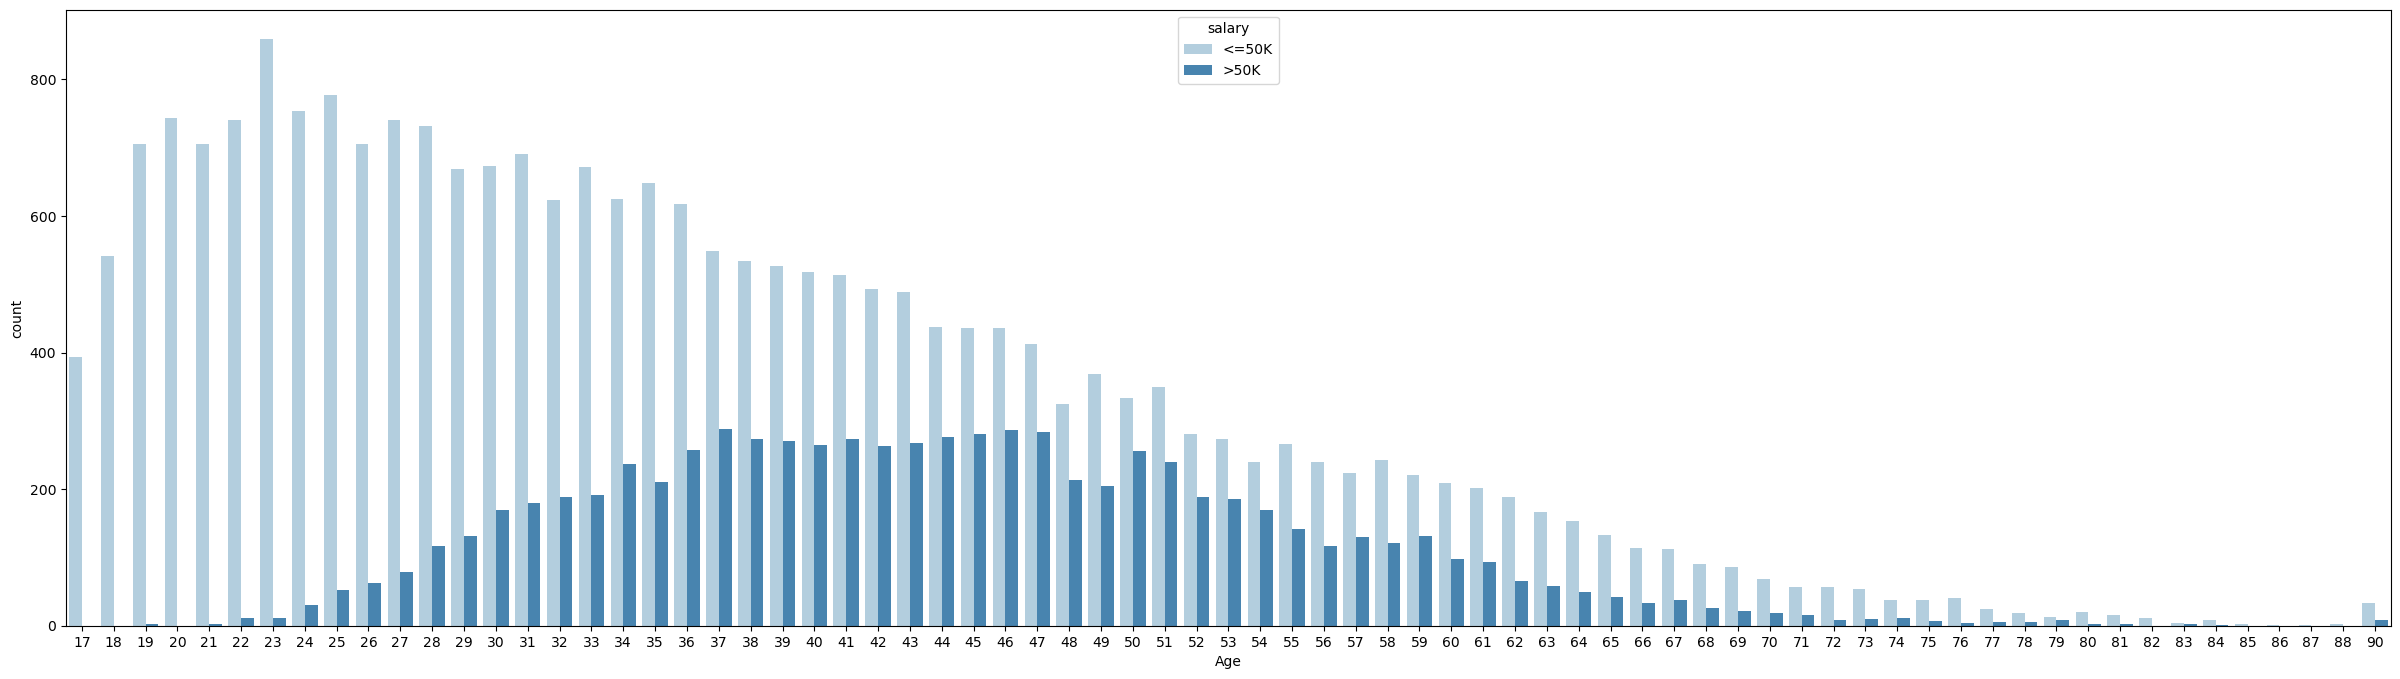

In [26]:
plt.figure(figsize=(30,8))
sns.countplot(data=df,x='age',hue="salary",palette='Blues')
plt.xlabel("Age")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

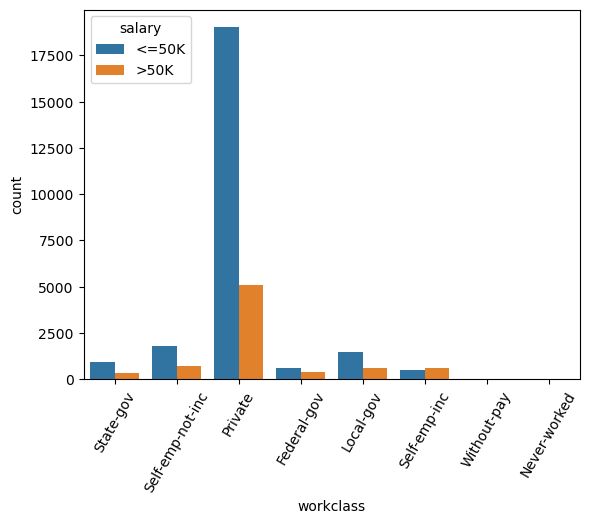

In [27]:
sns.countplot(data=df,x="workclass",hue="salary")
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, '7th-8th'),
  Text(8, 0, 'Doctorate'),
  Text(9, 0, 'Assoc-voc'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

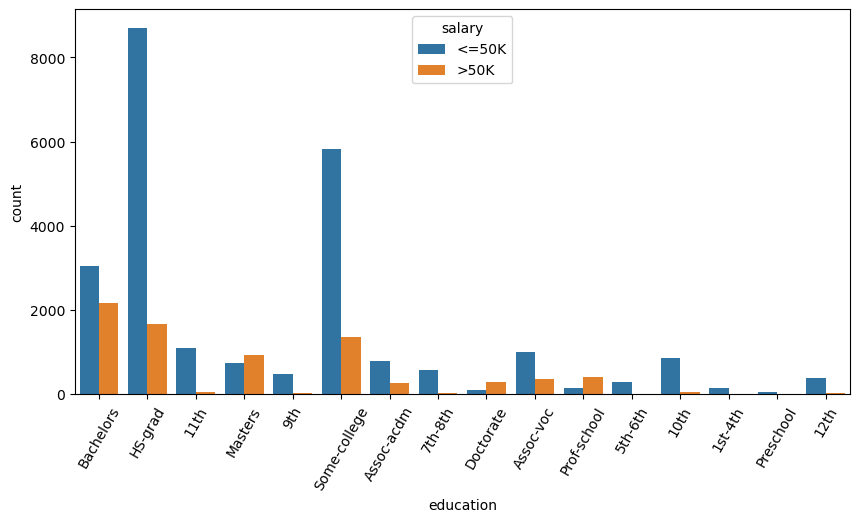

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="education",hue="salary")
plt.xticks(rotation=60)

(0.0, 20000.0)

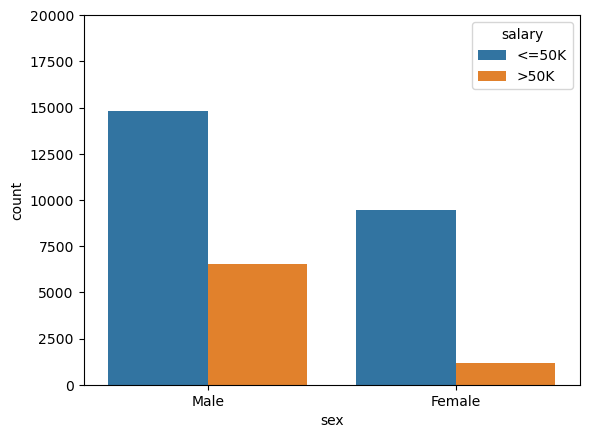

In [29]:
sns.countplot(data=df,x="sex",hue="salary")
plt.ylim(0,20000)

In [30]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076704,0.036614,0.077490,0.057282,0.068299
fnlwgt,-0.076704,1.000000,-0.044256,0.001087,-0.010139,-0.018885
education-num,0.036614,-0.044256,1.000000,0.122736,0.080565,0.149417
capital-gain,0.077490,0.001087,0.122736,1.000000,-0.031499,0.079112
capital-loss,0.057282,-0.010139,0.080565,-0.031499,1.000000,0.053106
hours-per-week,0.068299,-0.018885,0.149417,0.079112,0.053106,1.000000


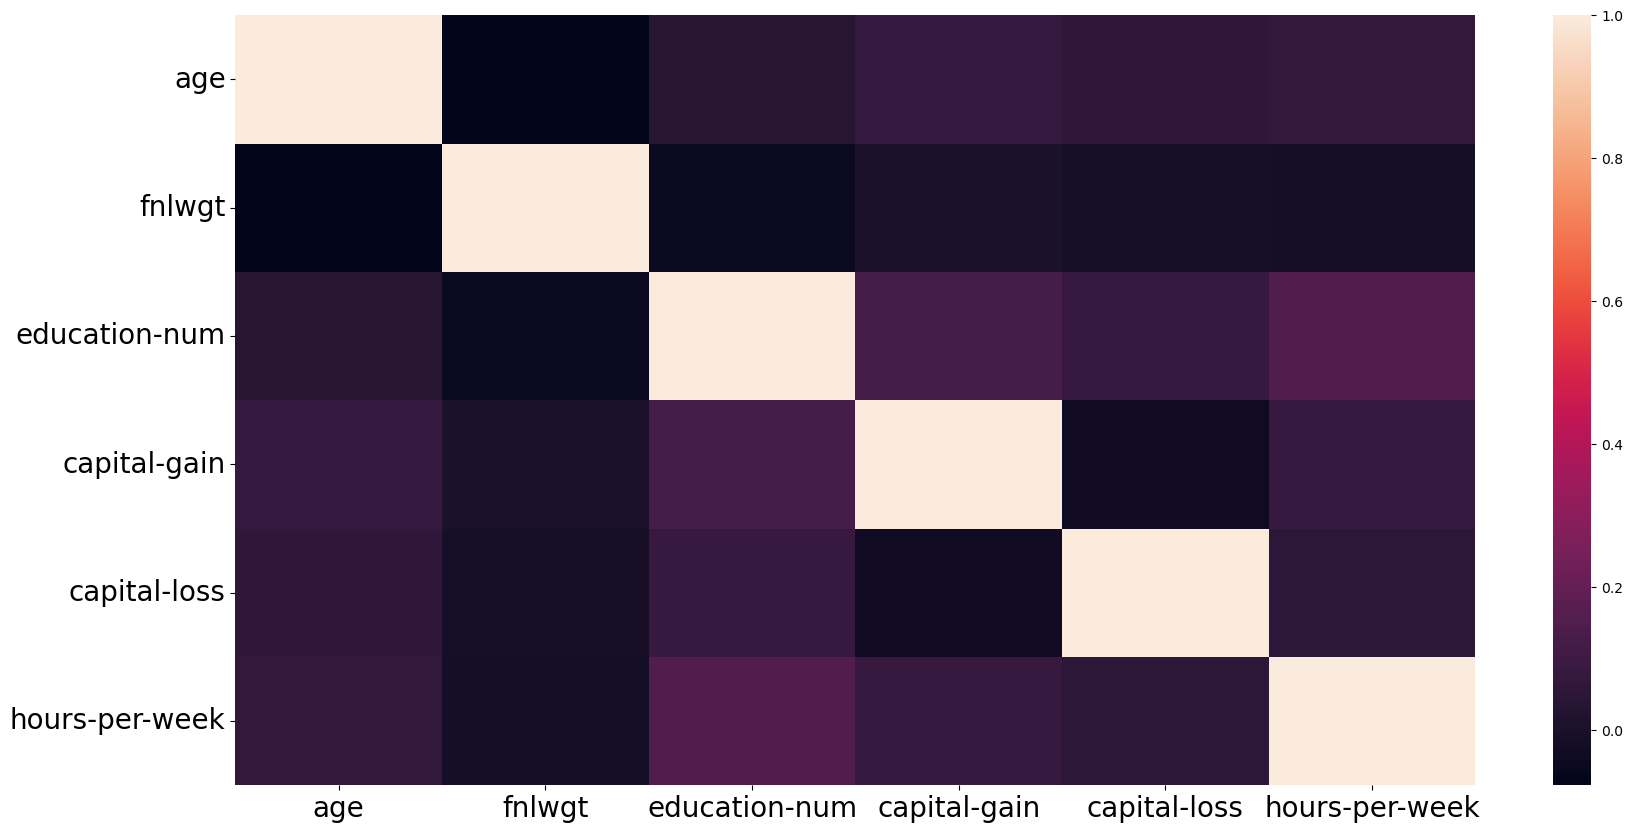

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.tick_params(labelsize=20)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

In [32]:
threshold = 700

# Calculate frequencies of each category
country_category_counts = df['country'].value_counts()

# Determine less frequent categories
less_frequent_country = country_category_counts[country_category_counts < threshold].index

# Replace less frequent categories with 'Other'
df.loc[df['country'].isin (less_frequent_country), 'country'] = 'Non US'


In [33]:
threshold = 1000

# Calculate frequencies of each category
education_category_counts = df['education'].value_counts()

# Determine less frequent categories
less_frequent_education = education_category_counts[education_category_counts < threshold].index

# Replace less frequent categories with 'Other'
df.loc[df['education'].isin (less_frequent_education), 'education'] = 'Below 10th'


In [34]:
threshold = 1000

# Calculate frequencies of each category
occupation_category_counts = df['occupation'].value_counts()

# Determine less frequent categories
less_frequent_occupation = occupation_category_counts[occupation_category_counts < threshold].index

# Replace less frequent categories with 'Other'
df.loc[df['occupation'].isin(less_frequent_occupation), 'occupation'] = 'Otheroccupation'


In [35]:
df["country"].value_counts()

United-States    29170
Non US            2808
Name: country, dtype: int64

In [36]:
df['occupation'].value_counts()

Prof-specialty       5854
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Otheroccupation      2697
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Name: occupation, dtype: int64

In [37]:
df['education'].value_counts()

HS-grad         10368
Some-college     7187
Bachelors        5210
Below 10th       3951
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
Name: education, dtype: int64

In [38]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=["salary"])
y = df["salary"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# This will split the features (X) and target variable (y) into training and testing sets.
# The training set will contain 80% of the data, and the testing set will contain 20%.
# The random_state parameter is set to 10 to ensure reproducibility of the same train-test split.


In [39]:
# Initialize a LabelEncoder object
le = LabelEncoder()

# Encode the target variable in the training set
y_train = le.fit_transform(y_train)

# Encode the target variable in the testing set
y_test = le.transform(y_test)

In [40]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,country
29856,52,Private,90189,Below 10th,4,Otheroccupation,Female,0,0,16,United-States
911,38,Private,278924,Some-college,10,Craft-repair,Male,0,0,44,United-States
6944,44,Private,199191,HS-grad,9,Adm-clerical,Female,0,0,30,United-States
5913,18,Private,98667,11th,7,Other-service,Female,0,0,16,United-States
4628,29,Private,250679,HS-grad,9,Craft-repair,Male,0,0,40,United-States


In [41]:
# Define the categories for ordinal encoding
categories = [["Assoc-voc", "Assoc-acdm", "Masters", "Bachelors", "Some-college", "HS-grad", "11th", "Below 10th"]]

# Initialize a ColumnTransformer with an OrdinalEncoder
oe = ColumnTransformer([
    ("oe", OrdinalEncoder(categories=categories), [3])
], remainder="passthrough")

In [42]:
# Initialize a ColumnTransformer with a OneHotEncoder
ohe = ColumnTransformer([
    ("ohe", OneHotEncoder(sparse=False, drop="first", max_categories=25), [2, 5, 6, 10])
], remainder="passthrough")

In [43]:
# Initialize a ColumnTransformer with a MinMaxScaler
mm = ColumnTransformer([
    ("mm", MinMaxScaler(), slice(0, 62))
], remainder="passthrough")

In [44]:
# Initialize a SelectKBest object with chi-square scoring function
fs = SelectKBest(score_func=chi2, k="all")

In [45]:
# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=10)
# The `DecisionTreeClassifier` class is used to create a decision tree classifier model.
# The `random_state` parameter is set to 10 for reproducibility.

# Create a Logistic Regression Classifier
model = LogisticRegression(penalty="l2", max_iter=1000, solver="lbfgs", random_state=10)
# The `LogisticRegression` class is used to create a logistic regression classifier model.
# The `penalty` parameter is set to "l2" for ridge regularization.
# The `max_iter` parameter is set to 1000 to control the maximum number of iterations.
# The `solver` parameter is set to "lbfgs" for the optimization algorithm.
# The `random_state` parameter is set to 10 for reproducibility.

# Create a Random Forest Classifier
model = RandomForestClassifier(criterion="gini", random_state=10)
# The `RandomForestClassifier` class is used to create a random forest classifier model.
# The `criterion` parameter is set to "gini" to measure the quality of the split.
# The `random_state` parameter is set to 10 for reproducibility.


In [46]:
# Create a pipeline with the defined transformers and model
pipe = Pipeline([
    ("oe", oe),     # OrdinalEncoder
    ("ohe", ohe),   # OneHotEncoder
    ("mm", mm),     # MinMaxScaler
    ("fs", fs),     # SelectKBest
    ("model", model)  # Classifier model
])

In [47]:
pipe.fit(X_train,y_train)

C:\Users\Alok\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('oe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe',
                                                  OrdinalEncoder(categories=[['Assoc-voc',
                                                                              'Assoc-acdm',
                                                                              'Masters',
                                                                              'Bachelors',
                                                                              'Some-college',
                                                                              'HS-grad',
                                                                              '11th',
                                                                              'Below '
                                                                              '10th']]),
                                                  [3])])),
                ('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                max_categories=25,
                                                                sparse=False),
                                                  [2, 5, 6, 10])])),
                ('mm',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mm', MinMaxScaler(),
                                                  slice(0, 62, None))])),
                ('fs',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x000001CFEBA54430>)),
                ('model', RandomForestClassifier(random_state=10))])

In [48]:
y_pred = pipe.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred)*100

83.130081300813

#### Logistic Regression highest accuracy = 82.95  when k = all & penalty="l2", max_iter=1000, solver="lbfgs"
#### Random Forest highest accuracy = 83.03 when k = all & criterion="gini"
#### DecisionTree Classifier highest accuracy = 83.13 when k = 25 & random_state=10

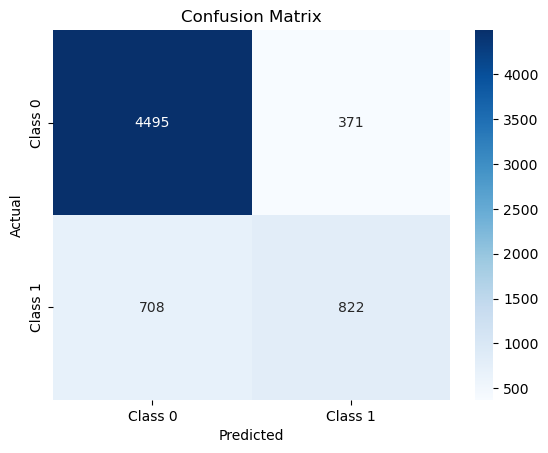

In [50]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Class 0', 'Class 1'])
ax.yaxis.set_ticklabels(['Class 0', 'Class 1'])

# Display the plot
plt.show()

In [51]:
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipe, file)